__DSC 478__

__Jonathan Lynch__

# Assignment 4 - Part 2

## PCA for Dimensionality Reduction in Clustering

__Import libraries:__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
import importlib
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn import decomposition

## A: Load in the image data matrix and numeric class labels, and perform min-max normalization on the data matrix so that each feature is scaled to [0,1] range:

In [2]:
%cd "/Users/jonathanlynch/Desktop/DSC 478/segmentation_data"

column_names = pd.read_table("segmentation_names.txt", header = None)

data = pd.read_table("segmentation_data.txt", sep = ",", header = None)

labels = pd.read_table('segmentation_classes.txt',sep='\t', header=None, names=['class', 'num_label'])

/Users/jonathanlynch/Desktop/DSC 478/segmentation_data


__Add column names to data and take a look at dataframe:__

In [3]:
column_names = list(column_names[0])
data.columns = column_names
data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [4]:
data.shape

(2100, 19)

__Look at class labels:__

In [5]:
labels.head()

,class,num_label
0,GRASS,0
1,GRASS,0
2,GRASS,0
3,GRASS,0
4,GRASS,0


In [6]:
labels.shape

(2100, 2)

__Normalize data using min-max normalization:__

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)

In [8]:
data = pd.DataFrame(data_norm, columns = column_names)
data.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.430830,0.741667,0.0,0.0,0.0,0.034221,0.000672,0.027329,0.000856,0.090111,0.079417,0.061119,0.130943,0.731343,0.014118,0.872865,0.123711,0.508139,0.831849
1,0.335968,0.733333,0.0,0.0,0.0,0.038023,0.000726,0.032298,0.000541,0.095791,0.085089,0.068483,0.134840,0.729478,0.023529,0.859583,0.127393,0.463329,0.836986
2,0.885375,0.970833,0.0,0.0,0.0,0.115970,0.002213,0.067081,0.001097,0.085463,0.075365,0.061856,0.120031,0.736940,0.038824,0.827324,0.113402,0.480149,0.844782
3,0.181818,0.920833,0.0,0.0,0.0,0.043726,0.001265,0.022360,0.000645,0.088562,0.080227,0.059647,0.127046,0.748134,0.014118,0.855787,0.120029,0.500966,0.825889
4,0.379447,0.729167,0.0,0.0,0.0,0.039924,0.000697,0.026087,0.000725,0.108701,0.101297,0.078056,0.148090,0.748134,0.010588,0.861480,0.139912,0.442661,0.823924


## B: Perform Kmeans clustering (using K=7) with a Euclidean distance measure, print the cluster centroids, and compare 7 clusters to the 7 pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters:

__Initialization and clustering:__

In [9]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1)  # default distance measure is Euclidean
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 523.6573548462195
Iteration 1, inertia 375.6938080017793
Iteration 2, inertia 374.1534152094524
Iteration 3, inertia 373.9334189020927
Iteration 4, inertia 373.8539230524088
Iteration 5, inertia 373.8064593427268
Iteration 6, inertia 373.80049254732063
Iteration 7, inertia 373.7986317945441
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 566.6843151290105
Iteration 1, inertia 394.9480978709289
Iteration 2, inertia 388.5086445711954
Iteration 3, inertia 385.48381015671026
Iteration 4, inertia 383.4600606186506
Iteration 5, inertia 381.4821002232365
Iteration 6, inertia 378.8445939629714
Iteration 7, inertia 374.5606322041479
Iteration 8, inertia 370.4865888010894
Iteration 9, inertia 370.0368200757536
Iteration 10, inertia 369.9399372176269
Iteration 11, inertia 369.90962630131344
Iteration 12, inertia 369.88875874882723
Iteration 13, inertia 369.879807287568
Iteration 14, inertia 369.8749818945365
I

KMeans(max_iter=500, n_clusters=7, verbose=1)

__Look at the clusters each image was assigned to:__

In [10]:
clusters = kmeans.predict(data)
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,3
1,3
2,3
3,3
4,3
...,...
2095,6
2096,2
2097,0
2098,0


__Look at the cluster centroids:__

In [15]:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = column_names)
centroids

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.77,0.43,0.00,0.01,0.02,0.04,0.00,0.02,0.00,0.04,0.03,0.06,0.03,0.78,0.22,0.49,0.06,0.54,0.24
1,0.54,0.15,0.00,0.03,0.00,0.03,0.00,0.03,0.00,0.82,0.78,0.89,0.79,0.27,0.67,0.29,0.89,0.21,0.13
2,0.25,0.39,0.00,0.08,0.02,0.08,0.00,0.06,0.01,0.15,0.14,0.18,0.12,0.72,0.34,0.35,0.18,0.41,0.20
3,0.51,0.81,0.00,0.08,0.01,0.05,0.00,0.05,0.00,0.11,0.09,0.09,0.14,0.68,0.08,0.82,0.13,0.41,0.89
4,0.75,0.53,0.00,0.04,0.04,0.11,0.02,0.11,0.02,0.30,0.28,0.35,0.26,0.59,0.45,0.31,0.35,0.30,0.16
5,0.30,0.53,0.00,0.05,0.05,0.10,0.01,0.08,0.01,0.40,0.37,0.47,0.35,0.50,0.57,0.21,0.47,0.30,0.16
6,0.25,0.46,0.00,0.03,0.01,0.04,0.00,0.03,0.00,0.03,0.02,0.04,0.02,0.77,0.22,0.51,0.04,0.80,0.18


__Compare clusters to pre-assigned class labels by computing completeness and homogeneity values of generated clusters:__

In [18]:
completeness = completeness_score(labels['num_label'], clusters)
homogeneity = homogeneity_score(labels['num_label'], clusters)

print('Completeness of Clusters: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Clusters: 0.6117374684331665
Homogeneity of Clusters: 0.6100499914689614


## C: Perform PCA on the normalized image data matrix.  Analyze the principal components to determine the number of PCs needed to capture at least 95% of variance in the data. Then use these components as features to transform the data into a reduced dimension space:

__Perform PCA to obtain the top 10 principal components:__

In [37]:
pca = decomposition.PCA(n_components=10)
data_trans = pca.fit(data_norm).transform(data_norm)  # transforming data

In [38]:
print(pca.explained_variance_ratio_)  # look at the explained variance of each PC

[0.60714234 0.13196979 0.10123773 0.04543539 0.03547361 0.01988035
 0.0189197  0.01615409 0.01065601 0.00711338]


From the above, by manually summing these values, it appears that 7 principal components are needed to explain at least 95% of the shared variance in the data.

In [42]:
pc = 0
variance = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    variance += i*100
    print("Cumulative variance captured by " + str(pc) + " Principal Component(s): " + str(variance))

Cumulative variance captured by 1 Principal Component(s): 60.714233968533236
Cumulative variance captured by 2 Principal Component(s): 73.91121320168922
Cumulative variance captured by 3 Principal Component(s): 84.03498614256185
Cumulative variance captured by 4 Principal Component(s): 88.5785253433258
Cumulative variance captured by 5 Principal Component(s): 92.12588648109563
Cumulative variance captured by 6 Principal Component(s): 94.11392197960618
Cumulative variance captured by 7 Principal Component(s): 96.00589227704951
Cumulative variance captured by 8 Principal Component(s): 97.6213010819451
Cumulative variance captured by 9 Principal Component(s): 98.68690193362026
Cumulative variance captured by 10 Principal Component(s): 99.39823945149527


The first 7 principal components (PC1, PC2, PC3, PC4, PC5, PC6, & PC7) capture approximately 96% of the variance in the data.

__Visualize using a scree plot:__

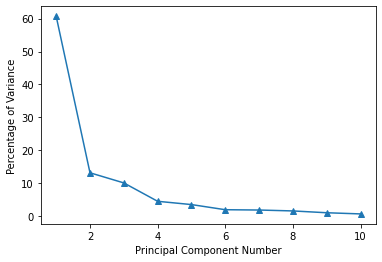

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 11), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

__Transform data into a reduced dimension space using the first 7 principal components as features:__

In [43]:
pca = decomposition.PCA(n_components=7)
data_trans = pca.fit(data_norm).transform(data_norm)

In [44]:
np.set_printoptions(precision=2,suppress=True)
print(data_trans)

[[-0.69  0.53  0.25 ... -0.08  0.05 -0.05]
 [-0.67  0.51  0.34 ... -0.04  0.06 -0.04]
 [-0.71  0.77 -0.16 ... -0.17  0.04 -0.06]
 ...
 [-0.51 -0.13 -0.08 ... -0.03 -0.03 -0.11]
 [-0.48 -0.09 -0.16 ...  0.   -0.   -0.09]
 [-0.44 -0.11 -0.05 ...  0.02 -0.21  0.15]]


In [45]:
data_trans.shape  # verify the size of the reduced data matrix

(2100, 7)

## D: Perform Kmeans clustering on the lower dimensional transformed data, and then compute the Completeness and Homogeneity values of the new clusters:

__Initialization and clustering:__

In [46]:
kmeans = KMeans(n_clusters=7, max_iter=500, verbose=1)
kmeans.fit(data_trans)

Initialization complete
Iteration 0, inertia 431.54095966339895
Iteration 1, inertia 293.6059898926563
Iteration 2, inertia 288.23230865444935
Iteration 3, inertia 286.90473385068674
Iteration 4, inertia 286.48674744371976
Iteration 5, inertia 286.4482142878078
Iteration 6, inertia 286.44390325738385
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 569.7564544063703
Iteration 1, inertia 380.25528929089074
Iteration 2, inertia 346.5187323515604
Iteration 3, inertia 310.90766923393005
Iteration 4, inertia 291.41086610282576
Iteration 5, inertia 287.37509535198814
Iteration 6, inertia 286.80634908592884
Iteration 7, inertia 286.6855823893377
Iteration 8, inertia 286.49753297080554
Iteration 9, inertia 286.44944634359734
Iteration 10, inertia 286.4444019246627
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 459.0323581128199
Iteration 1, inertia 306.7879399433237
Iteration 2, inertia 304.3078613456833
Ite

KMeans(max_iter=500, n_clusters=7, verbose=1)

__Clusters each image was assigned to:__

In [47]:
clusters = kmeans.predict(data_trans)
pd.DataFrame(clusters, columns=["Cluster"])

,Cluster
0,2
1,2
2,2
3,2
4,2
...,...
2095,0
2096,6
2097,4
2098,4


__Compare clusters to pre-assigned class labels by computing completeness and homogeneity values of generated clusters using the lower dimension transformed data:__

In [48]:
completeness = completeness_score(labels['num_label'], clusters)
homogeneity = homogeneity_score(labels['num_label'], clusters)

print('Completeness of Clusters: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Clusters: 0.6118121490278483
Homogeneity of Clusters: 0.6101643468512763


## E: Discuss observations:

Comparing the clustering results of the lower dimension transformed data to the clustering results of the full data matrix, both the completeness (extent to which all members of a given class are assigned to the same cluster) and the homogeneity (the extent to which each cluster contains only members of a single class) scores are slightly better with the lower dimension transformed data.  The completeness of the clusters using the full data matrix was approximately 0.6117 and the completeness of the clusters with the lower dimension transformed data is approximately 0.6118.  The homogeneity of the clusters using the full data matrix was approximately 0.6100 and the homogeneity of the clusters with the lower dimension transformed data is approximately 0.6102.  Thus, by using PCA to find the number of principal components that capture a certain percentage threshold of the shared variance, and then using these components to transform the data into a lower dimensional space (reduced number of features/attributes), the results of performing kmeans clustering were actually improved slightly with only a fraction of the number of initial features (7 instead of 19).